In [30]:
%pip install numpy pandas yfinance feedparser transformers torch prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt

In [32]:
nifty50 = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "HINDUNILVR.NS",
    "ICICIBANK.NS", "KOTAKBANK.NS", "LT.NS", "SBIN.NS", "AXISBANK.NS",
    "BHARTIARTL.NS", "ITC.NS", "MARUTI.NS", "ASIANPAINT.NS", "NESTLEIND.NS",
    "HCLTECH.NS", "SUNPHARMA.NS", "ULTRACEMCO.NS", "TITAN.NS", "POWERGRID.NS",
    "BAJFINANCE.NS", "DIVISLAB.NS", "TECHM.NS", "TATASTEEL.NS", "ONGC.NS",
    "JSWSTEEL.NS", "WIPRO.NS", "DRREDDY.NS", "M&M.NS", "COALINDIA.NS",
    "HDFCLIFE.NS", "BPCL.NS", "ADANIGREEN.NS", "GRASIM.NS", "EICHERMOT.NS",
    "SBILIFE.NS", "INDUSINDBK.NS", "HINDALCO.NS", "TORNTPOWER.NS", "CIPLA.NS",
    "SHREECEM.NS", "ONGC.NS", "TATAMOTORS.NS", "BAJAJ-AUTO.NS", "BAJAJFINSV.NS",
    "IOC.NS", "TATACONSUM.NS", "COLPAL.NS", "HAVELLS.NS", "VEDL.NS"
]

In [33]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*3)

df = yf.download(nifty50, startDate, endDate)['Close']
df.tail()

C:\Users\sahil\AppData\Local\Temp\ipykernel_1216\2958020234.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(nifty50, startDate, endDate)['Close']
[*********************100%***********************]  49 of 49 completed


Ticker,ADANIGREEN.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,CIPLA.NS,COALINDIA.NS,...,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TORNTPOWER.NS,ULTRACEMCO.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2025-08-08,914.049988,2475.600098,1058.099976,8224.0,1919.199951,877.150024,1858.599976,319.450012,1485.800049,379.700012,...,1051.000000,633.700012,157.949997,3036.399902,1480.400024,3460.199951,1335.800049,12157.0,431.450012,239.050003
2025-08-11,929.099976,2489.100098,1073.300049,8275.0,1922.800049,877.799988,1857.400024,320.950012,1504.800049,382.500000,...,1059.099976,653.750000,158.520004,3040.800049,1481.099976,3467.899902,1345.000000,12405.0,430.100006,241.619995
2025-08-12,930.900024,2478.300049,1070.000000,8196.5,1908.000000,853.000000,1850.300049,323.700012,1521.599976,385.350006,...,1046.800049,654.099976,160.160004,3035.399902,1509.300049,3486.800049,1358.099976,12449.0,433.250000,241.720001
2025-08-13,924.150024,2500.199951,1066.000000,8248.5,1914.400024,860.000000,1867.400024,322.500000,1561.000000,386.100006,...,1056.099976,663.750000,160.179993,3036.199951,1506.300049,3466.800049,1362.099976,12401.0,438.750000,241.649994
2025-08-14,917.500000,2528.699951,1068.199951,8213.5,1925.099976,861.450012,1873.800049,318.049988,1564.000000,384.450012,...,1051.199951,664.599976,155.300003,3022.300049,1486.699951,3489.399902,1329.599976,12317.0,430.200012,246.809998


In [34]:
returns = df.pct_change()

momentum_10d = df.pct_change(10)
momentum_30d = df.pct_change(30)
momentum_90d = df.pct_change(90)

ma_50 = df.rolling(window = 50).mean()
ma_200 = df.rolling(window = 200).mean()

vol_30 = returns.rolling(window = 30).std()

print("Momentum 10-day example:\n", momentum_10d.tail())
print("50-day moving average example:\n", ma_50.tail())
print("30-day volatility example:\n", vol_30.tail())

Momentum 10-day example:
 Ticker      ADANIGREEN.NS  ASIANPAINT.NS  AXISBANK.NS  BAJAJ-AUTO.NS  \
Date                                                                   
2025-08-08      -0.063377       0.059670    -0.025780       0.018389   
2025-08-11      -0.074509       0.054882    -0.000279       0.022931   
2025-08-12      -0.083399       0.031980     0.005450       0.008490   
2025-08-13      -0.084728       0.034937    -0.006801       0.025486   
2025-08-14      -0.068244       0.055340    -0.000187       0.025662   

Ticker      BAJAJFINSV.NS  BAJFINANCE.NS  BHARTIARTL.NS   BPCL.NS  CIPLA.NS  \
Date                                                                          
2025-08-08      -0.033538      -0.040055      -0.040921 -0.025953 -0.030473   
2025-08-11      -0.027809      -0.003066      -0.017405 -0.022847 -0.042748   
2025-08-12      -0.032749      -0.037843      -0.035448 -0.019035 -0.033291   
2025-08-13      -0.023166      -0.028084      -0.033737 -0.028761  0.00102

In [35]:
import feedparser

def get_headlines(ticker):
    url = f"https://news.google.com/rss/search?q={ticker}"
    feed = feedparser.parse(url)
    headlines = [entry.title for entry in feed.entries[:5]]
    return headlines

print(get_headlines("ADANIGREEN.NS"))

["India's Adani Green Energy posts quarterly profit jump on strong power sales - sg.finance.yahoo.com", "India's Adani Green aims 5 GW of clean energy addition in FY26 at $3.6 bln capex - Reuters", 'Investing in Solutions: The Opportunity in India’s Pollution Crisis - AInvest', 'MSCI adds Hyundai Motor India to key global index, removes Adani Green Energy - Reuters', "India's Adani to pull out of Sri Lanka wind power projects - sg.finance.yahoo.com"]


In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

def get_sentiment_score(headlines):
    if not headlines:
        return 0.0
    inputs = tokenizer(headlines, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = torch.softmax(logits, dim=1)
    raw_score = (probs[:, 2] - probs[:, 0]).mean().item()
    
    clamped = max(-1.0, min(1.0, raw_score))
    
    return round(clamped, 6)


In [37]:
sentiment_scores = {}
for ticker in nifty50:
    news = get_headlines(ticker)
    score = get_sentiment_score(news)
    sentiment_scores[ticker] = score


sentiment_series = pd.Series(sentiment_scores)
sentiment_series.head()


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


RELIANCE.NS     -0.398289
TCS.NS           0.558193
HDFCBANK.NS     -0.185706
INFY.NS          0.000005
HINDUNILVR.NS   -0.399901
dtype: float64

In [38]:
latest_mom30 = momentum_30d.iloc[-1]
latest_sent = sentiment_series      


mom30_rank = latest_mom30.rank(ascending=False, method='dense')
sent_rank = latest_sent.rank(ascending=False, method='dense')

In [39]:
w_mom, w_sent = 0.7, 0.3

max_rank = len(nifty50)
norm_mom = mom30_rank / max_rank
norm_sent = sent_rank / max_rank

composite_score = w_mom * norm_mom + w_sent * norm_sent

composite_rank = composite_score.sort_values(ascending=False)

In [40]:
composite_rank

INDUSINDBK.NS    0.878
TECHM.NS         0.848
NESTLEIND.NS     0.816
HCLTECH.NS       0.800
TORNTPOWER.NS    0.784
BHARTIARTL.NS    0.762
ADANIGREEN.NS    0.760
RELIANCE.NS      0.720
COLPAL.NS        0.708
TATASTEEL.NS     0.694
INFY.NS          0.684
DIVISLAB.NS      0.676
TCS.NS           0.664
AXISBANK.NS      0.656
VEDL.NS          0.656
BAJFINANCE.NS    0.650
ONGC.NS          0.614
HAVELLS.NS       0.588
TATACONSUM.NS    0.584
BAJAJFINSV.NS    0.564
TATAMOTORS.NS    0.556
KOTAKBANK.NS     0.530
TITAN.NS         0.492
WIPRO.NS         0.478
GRASIM.NS        0.474
SUNPHARMA.NS     0.456
BPCL.NS          0.430
SHREECEM.NS      0.424
ITC.NS           0.412
BAJAJ-AUTO.NS    0.410
IOC.NS           0.402
DRREDDY.NS       0.400
EICHERMOT.NS     0.394
SBILIFE.NS       0.366
JSWSTEEL.NS      0.352
HINDALCO.NS      0.350
HDFCLIFE.NS      0.350
LT.NS            0.346
POWERGRID.NS     0.332
ULTRACEMCO.NS    0.314
M&M.NS           0.312
ICICIBANK.NS     0.312
HDFCBANK.NS      0.294
MARUTI.NS  

16:44:45 - cmdstanpy - INFO - Chain [1] start processing
16:44:45 - cmdstanpy - INFO - Chain [1] done processing


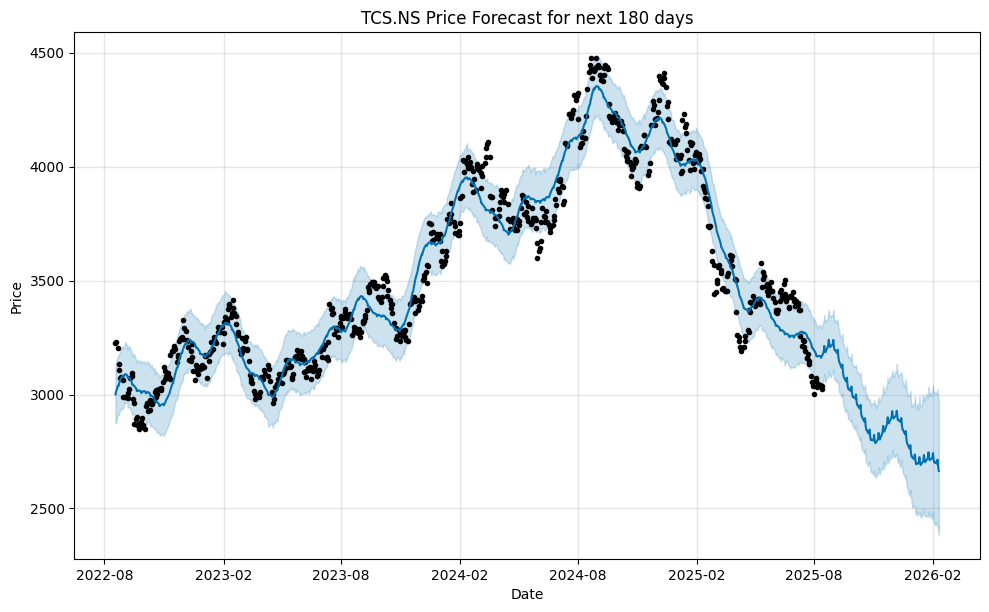

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-18,3160.226671,2874.796258,3128.354198,3160.226671,3160.226671,-159.501880,-159.501880,-159.501880,-199.593169,...,-5.268713,-5.268713,-5.268713,45.360002,45.360002,45.360002,0.0,0.0,0.0,3000.724791
1,2022-08-19,3161.293256,2877.371252,3144.359581,3161.293256,3161.293256,-148.410773,-148.410773,-148.410773,-199.593169,...,-2.112896,-2.112896,-2.112896,53.295292,53.295292,53.295292,0.0,0.0,0.0,3012.882483
2,2022-08-22,3164.493012,2915.807698,3170.883876,3164.493012,3164.493012,-125.445993,-125.445993,-125.445993,-199.593169,...,-2.404818,-2.404818,-2.404818,76.551995,76.551995,76.551995,0.0,0.0,0.0,3039.047020
3,2022-08-23,3165.559598,2910.152089,3165.988241,3165.559598,3165.559598,-126.984830,-126.984830,-126.984830,-199.593169,...,-11.098097,-11.098097,-11.098097,83.706435,83.706435,83.706435,0.0,0.0,0.0,3038.574768
4,2022-08-24,3166.626183,2923.549106,3178.515015,3166.626183,3166.626183,-114.725984,-114.725984,-114.725984,-199.593169,...,-5.499476,-5.499476,-5.499476,90.366661,90.366661,90.366661,0.0,0.0,0.0,3051.900199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,2026-02-06,2727.008209,2439.141663,3009.348972,2489.159812,3001.497831,-28.562171,-28.562171,-28.562171,-199.593169,...,-2.112896,-2.112896,-2.112896,173.143894,173.143894,173.143894,0.0,0.0,0.0,2698.446038
916,2026-02-07,2723.417495,2439.370494,3005.552304,2482.748936,3000.880898,-26.720100,-26.720100,-26.720100,-199.593169,...,1.434855,1.434855,1.434855,171.438215,171.438215,171.438215,0.0,0.0,0.0,2696.697395
917,2026-02-08,2719.826781,2419.566130,3022.190080,2476.615358,2999.089271,-5.524773,-5.524773,-5.524773,-199.593169,...,24.949145,24.949145,24.949145,169.119251,169.119251,169.119251,0.0,0.0,0.0,2714.302008
918,2026-02-09,2716.236068,2406.473147,2991.671997,2470.642001,2998.134681,-35.815556,-35.815556,-35.815556,-199.593169,...,-2.404818,-2.404818,-2.404818,166.182432,166.182432,166.182432,0.0,0.0,0.0,2680.420512


In [45]:
import matplotlib.pyplot as plt
from prophet import Prophet

def forecast_stock(ticker, days_ahead=30):
    hist = df[[ticker]].reset_index()
    hist.columns = ["ds","y"]
    m = Prophet(daily_seasonality=True)
    m.fit(hist)
    future = m.make_future_dataframe(periods=days_ahead)
    forecast = m.predict(future)
    m.plot(forecast)
    plt.title(f"{ticker} Price Forecast for next {days_ahead} days")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
    return forecast

forecast_stock('TCS.NS', days_ahead=180)